# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [0]:
#指定測試集與訓練資料集; 圖形已變784
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
print(x_train_image.shape, x_Train.shape)

(60000, 28, 28) (60000, 784)


In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#建立模型

model = Sequential()

W0706 06:41:46.361783 139783802095488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [9]:
#建構輸入層

model.add(Dense(units=256, #units: Positive integer, dimensionality of the output space.
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal',
                activation='relu'))



W0706 06:41:46.401112 139783802095488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 06:41:46.405760 139783802095488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [0]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0706 06:41:46.505430 139783802095488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 06:41:46.539458 139783802095488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0706 06:41:46.669580 139783802095488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0706 06:41:46.742199 139783802095488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 202us/step - loss: 0.2384 - acc: 0.9274 - val_loss: 0.1041 - val_acc: 0.9692
Epoch 2/10
48000/48000 [==============================] - 9s 179us/step - loss: 0.0999 - acc: 0.9700 - val_loss: 0.0950 - val_acc: 0.9718
Epoch 3/10
48000/48000 [==============================] - 9s 178us/step - loss: 0.0704 - acc: 0.9783 - val_loss: 0.0898 - val_acc: 0.9750
Epoch 4/10
48000/48000 [==============================] - 9s 178us/step - loss: 0.0532 - acc: 0.9840 - val_loss: 0.1158 - val_acc: 0.9683
Epoch 5/10
48000/48000 [==============================] - 9s 178us/step - loss: 0.0431 - acc: 0.9866 - val_loss: 0.0960 - val_acc: 0.9742
Epoch 6/10
48000/48000 [==============================] - 9s 180us/step - loss: 0.0385 - acc: 0.9881 - val_loss: 0.0970 - val_acc: 0.9751
Epoch 7/10
48000/48000 [==============================] - 9s 179us/step - loss: 0.0306 - acc: 0.9908 - val_loss: 0.0975 -

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

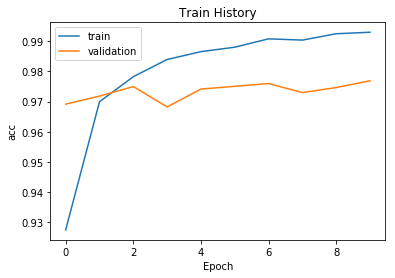

In [15]:
show_train_history(train_history,'acc','val_acc') #顯示訓練過程

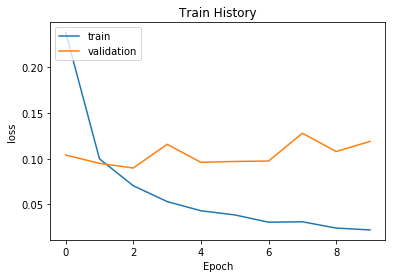

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)  #add layer沒有比較好阿??
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 53us/step

accuracy= 0.9791


換Loss function

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 194us/step - loss: 0.0047 - acc: 0.9986 - val_loss: 0.0202 - val_acc: 0.9953
Epoch 2/10
48000/48000 [==============================] - 9s 188us/step - loss: 0.0038 - acc: 0.9987 - val_loss: 0.0200 - val_acc: 0.9956
Epoch 3/10
48000/48000 [==============================] - 9s 187us/step - loss: 0.0037 - acc: 0.9988 - val_loss: 0.0190 - val_acc: 0.9955
Epoch 4/10
48000/48000 [==============================] - 9s 189us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0194 - val_acc: 0.9955
Epoch 5/10
48000/48000 [==============================] - 9s 189us/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0215 - val_acc: 0.9953
Epoch 6/10
48000/48000 [==============================] - 9s 188us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0210 - val_acc: 0.9955
Epoch 7/10
48000/48000 [==============================] - 9s 187us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0274 - 

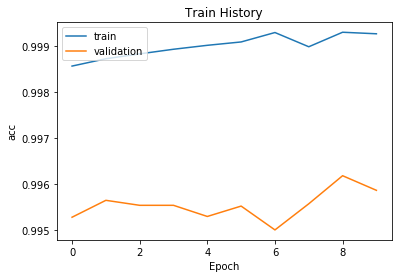

In [20]:
show_train_history(train_history,'acc','val_acc') #顯示訓練過程

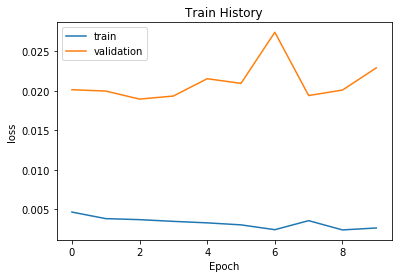

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)  #add layer沒有比較好阿??
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 51us/step

accuracy= 0.9957899974822998


Loss function換 binary crossentropy, accuracy由0.97 -> 0.99, 提高